In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as sig

This demo illustrates some of the issues related to the typical 1/f shape of amplitude and power spectra obtained from neural time series. 


Figure 1. Example of the 1/f shape of an empirical EEG spectrum, with the best fitting exponential function shown in red. Note how the power in the alpha band range (around 10Hz) deviates from the 1/f shape. Figure from Keil et al. https://doi.org/10.1111/psyp.14052


This shape (see figure above) is often modeled as an exponential function, characterized by higher amplitudes at lower frequencies and lower amplitudes at high frequencies (red line in figure above), and its presence in spectra creates some challenges for measuring and comparing spectral power/amplitude in neuroscience studies. We will look at how this shape may obscure signals that researchers may be interested in, but also how trial averaging, widely used in neuroscience impacts the effect of 1/f shape on detecting an oscillation. 

We start by making a discrete time vector, at which the signal will be sampled. 

In [2]:
from matplotlib.collections import LineCollection

time = np.linspace(0.001, 1, 1000)
faxis = np.arange(1, 1000)

whitesig = np.random.uniform(low=0.0, high=1.0, size=(50, 1000)) - 0.5
sumspec = np.abs(np.fft.fft(whitesig))
absspec = np.abs(np.fft.fft(whitesig[:, 1:100]))

# Prepare the line collection
segments = [np.column_stack((time, row)) for row in sumspec]
lc = LineCollection(segments)


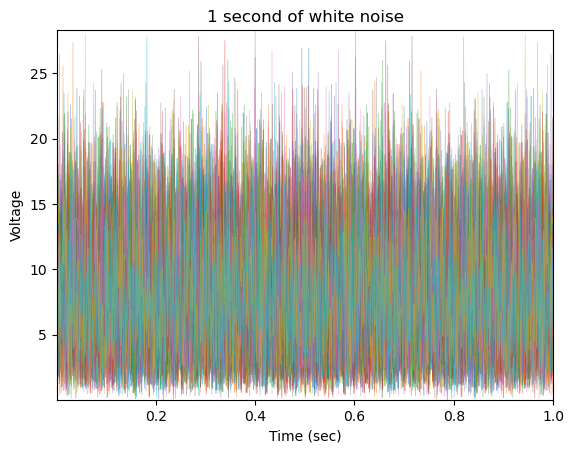

In [3]:
#Create the figure and axes
fig, ax = plt.subplots()
ax.add_collection(lc)
# *colors* is sequence of rgba tuples.
# *linestyle* is a string or dash tuple. Legal string values are
# solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq) where
# onoffseq is an even length tuple of on and off ink in points.  If linestyle
# is omitted, 'solid' is used.
# See `matplotlib.collections.LineCollection` for more information.
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
lc.set_color(colors)
lc.set_alpha(0.5)
lc.set_linewidth(0.5)
lc.set_linestyle('solid')
lc.set_array(np.arange(50))
lc.set_cmap('viridis')
lc.set_norm(plt.Normalize(0, 50))


#print(colors)
#fig.colorbar()
#axcb.set_label('Line Number')

# Set the axis labels and title
ax.set_xlim(time.min(), time.max())
ax.set_ylim(sumspec.min(), sumspec.max())
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Voltage')
ax.set_title('1 second of white noise')

# Display the plot
plt.show()



In [4]:
a,b,c=segments[0:3]
print(a.shape)
print(b.shape)
print(c.shape)

(1000, 2)
(1000, 2)
(1000, 2)


In [5]:
segments[0][:,1].min()

0.6187372984267109

In [6]:
time = np.linspace(0.001, 1, 1000)
faxis = np.arange(0, 501)

whitesig = np.random.uniform(low=0.0, high=1.0, size=(50,1000))-0.5
spec = np.abs(np.fft.fft(whitesig, axis=1))
#np.abs(fftspec[1:100])

avgspec=np.mean(sumspec[:, 2:100], axis=0)
#fftspec = np.fft.fftshift(avgspec)

In [7]:
time = np.linspace(0.001, 1, 1000)
faxis = np.arange(0, 501)

whitesig = np.random.uniform(low=0.0, high=1.0, size=(50, 1000)) - 0.5
sumspec = np.abs(np.fft.fft(whitesig))
absspec = np.abs(np.fft.fft(whitesig[:, 1:100]))

Text(0.5, 1.0, 'Averaged amplitude spectrum')

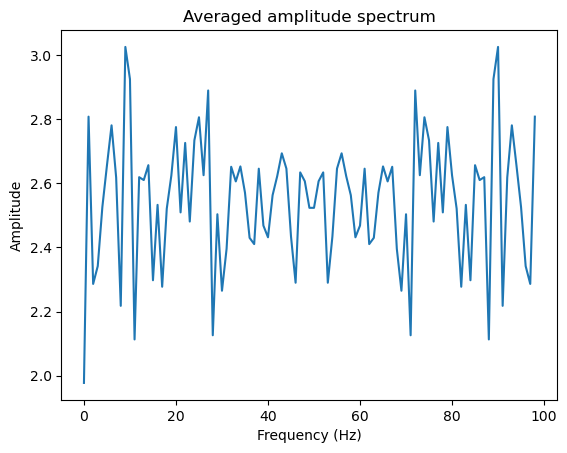

In [8]:
avgspec=np.mean(sumspec.real, axis=0)

plt.figure()
#plt.plot(avgspec[2:-1])
plt.plot(np.mean(absspec, axis=0))
#plt.axis([0, 100, 0, np.max(np.max(sumspec[:, 2:100]))])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Averaged amplitude spectrum')

In [9]:
time = np.linspace(0.001, 1, 1000) # one second of discrete time
faxis = np.arange(0, 501)
print(time.shape,faxis.shape) # frequency axis goes from 0 to nyquist in steps of 1

(1000,) (501,)


... now we make 50 trials of white noise (stochastic) segments, the same noise to be used for all future simulations. We display the white noise along with each trial's frequency spectrum, and finally calculate the average spectrum which is expected to be flat in nature, not showing a 1/f shape. 


In [10]:
print(time.shape)
whitesig=np.random.uniform(low=0.0, high=1.0, size=(50,1000))-0.5
#whitesig = np.random.uniform(-0.5,0.5,size=50,time.shape)#-0.5
print(whitesig.shape)
sumspec=np.zeros((50,1000))

(1000,)
(50, 1000)


10


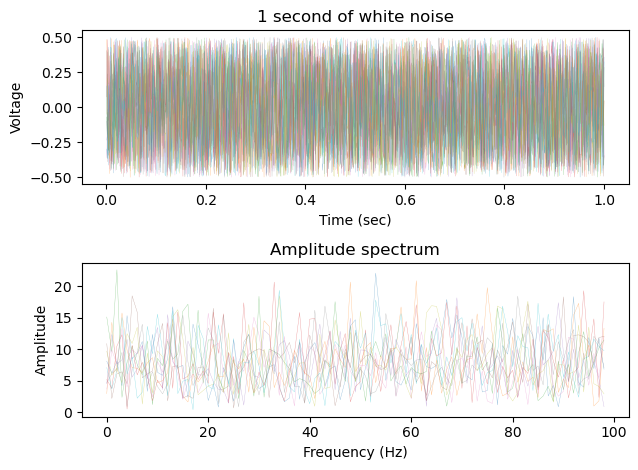

20


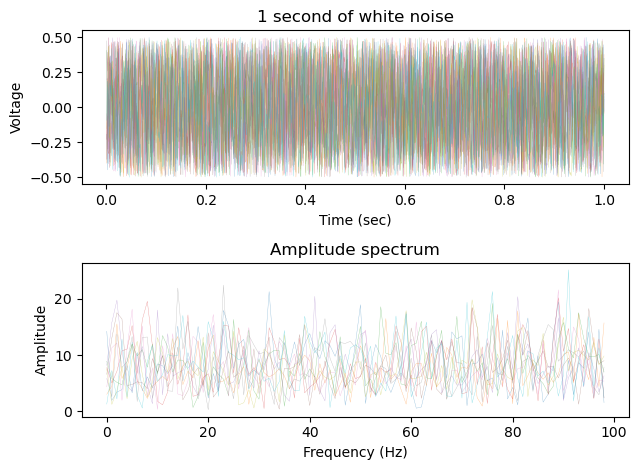

30


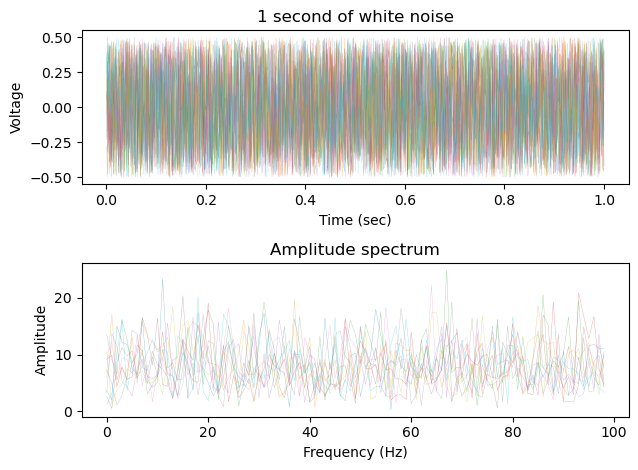

40


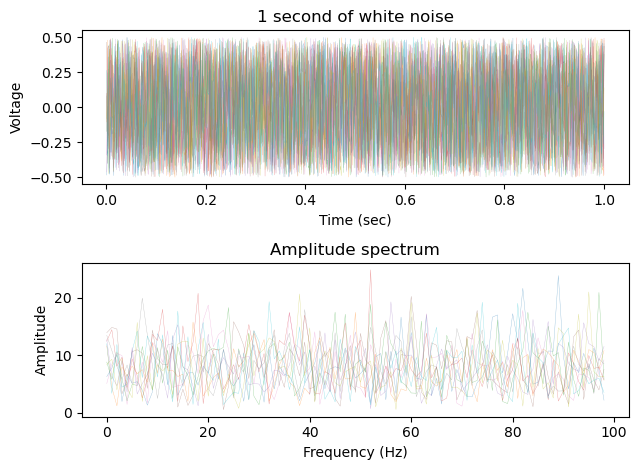

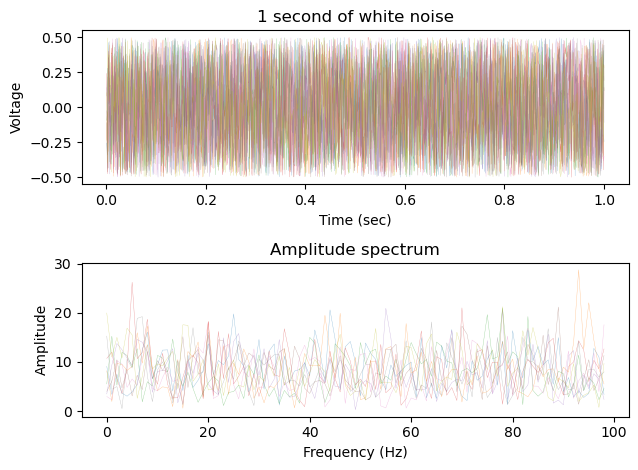

In [11]:

fig, ax = plt.subplots(2,1)

for trial in range(1,50):

    if np.mod(trial, 10)>=0:
        ax[0].set_title('1 second of white noise')
        ax[1].set_title('Amplitude spectrum')
        #plt.subplot(2, 1, 1)
        ax[0].plot(time, whitesig[trial, :], alpha=0.5, linewidth=0.25)
        ax[0].set_xlabel('Time (sec)')
        ax[0].set_ylabel('Voltage')
        ax[0].set_title('1 second of white noise')

        fftspec = np.fft.fft(whitesig[trial, :])
        sumspec[trial, :] = np.abs(fftspec)

        #plt.subplot(2, 1, 2)
        ax[1].plot(np.abs(fftspec[1:100]), alpha=0.5, linewidth=0.25)
        ax[1].set_xlabel('Frequency (Hz)')
        ax[1].set_ylabel('Amplitude')
        ax[1].set_title('Amplitude spectrum')

    if np.mod(trial, 10)==0:
        plt.tight_layout()
        print(trial)
        plt.show()
        fig, ax = plt.subplots(2,1)
        #ax[0].cla()
        #ax[1].cla()

plt.tight_layout()
#    # plt.pause(0.2)


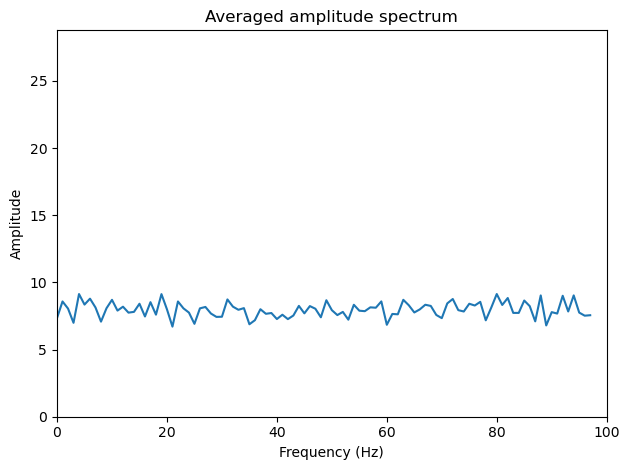

In [12]:
plt.figure()
plt.plot(np.mean(sumspec[:, 2:100], axis=0))
plt.axis([0, 100, 0, np.max(np.max(sumspec[:, 2:100]))])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Averaged amplitude spectrum')

plt.tight_layout()
plt.show()

Next, we repeat that process with the cumulative sum of the white noise, which results in brownian noise. The spectrum of brownian noise is expected to have a 1/f shape, characteristic for biological (including neural) systems. 


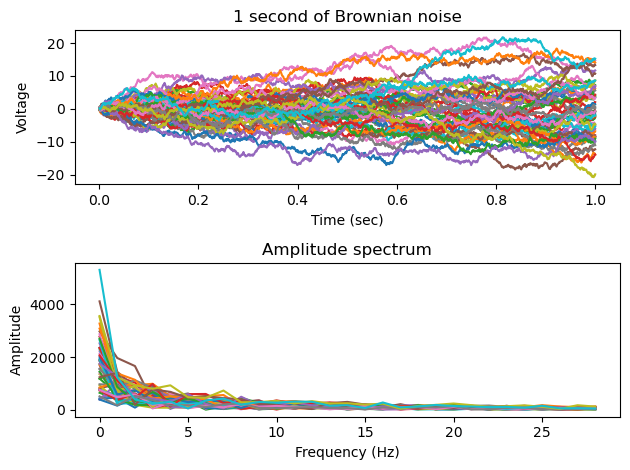

In [13]:
brownsig=np.zeros((50,1000)) # initialize matrix to hold all trials

fig, ax = plt.subplots(2,1)

for trial in range(50):
    brownsig[trial, :] = np.cumsum(whitesig[trial, :])
    
    plt.subplot(2, 1, 1)
    ax[0].plot(time, brownsig[trial, :])
    ax[0].set_xlabel('Time (sec)')
    ax[0].set_ylabel('Voltage')
    ax[0].set_title('1 second of Brownian noise')
    
    fftspec = np.fft.fft(brownsig[trial, :])  # calculate DFT
    sumspec[trial, :] = np.abs(fftspec)  # save it for later
    
    plt.subplot(2, 1, 2)
    ax[1].plot(np.abs(fftspec[1:30]))
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('Amplitude spectrum')
    
    #plt.pause(0.2)
plt.tight_layout()


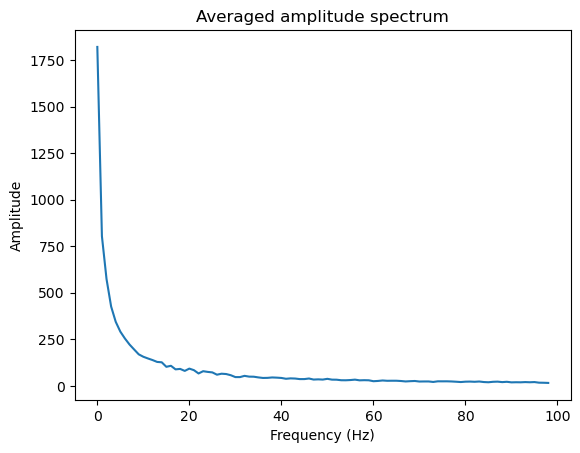

In [14]:
plt.figure()
plt.plot(np.mean(sumspec[:, 1:100], axis=0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Averaged amplitude spectrum')

plt.show()

Now, we add a variable alpha oscillation to each trial.

In [15]:
whitesig=np.random.uniform(low=0.0, high=1.0, size=(50,1000))-0.5
brownsig=np.zeros((50,1000)) # initialize matrix to hold all trials
alphasig = np.zeros((50, 1000))  # initialize matrix to hold all trials
#sumspec = np.abs(np.fft.fft(whitesig))
#fftspec = np.fft.fftshift(sumspec)
absspec = np.abs(np.fft.fft(whitesig[:, 1:100]))


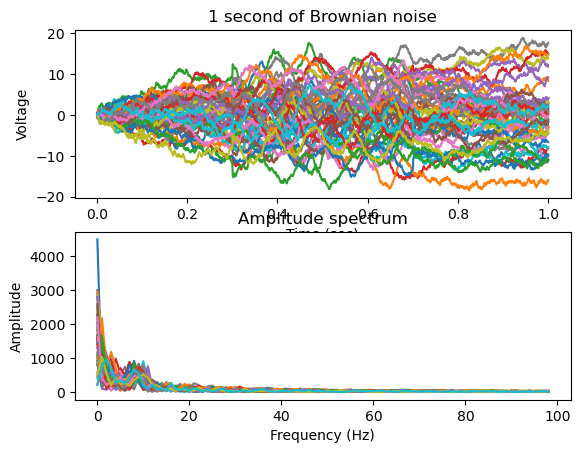

In [16]:
fig, ax = plt.subplots(2,1)

for trial in range(50):
    brownsig[trial, :] = np.cumsum(whitesig[trial, :])
    alphasig=np.sin(2 * np.pi * time * np.random.uniform(low=8.0, high=11.0))*3
    #alphasig = np.sin(2 * np.pi * time * (8 + np.random.rand(1) * 3)) * 3
    #random.uniform(low=0.0, high=1.0, size=(50,1000))-0.5
    brownsig[trial, 300:700] = brownsig[trial, 300:700] + alphasig[300:700]
    
    #fig,ax=plt.subplots(2,1)
    #ax[0].subplot(2, 1, 1)
    ax[0].plot(time, brownsig[trial, :])
    ax[0].set_xlabel('Time (sec)')
    ax[0].set_ylabel('Voltage')
    ax[0].set_title('1 second of Brownian noise')
    
    fftspec = np.fft.fft(brownsig[trial, :])  # calculate DFT
    sumspec[trial, :] = np.abs(fftspec)  # save it for later
    
    #plt.subplot(2, 1, 2)
    ax[1].plot(np.abs(fftspec[1:100]))
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('Amplitude spectrum')
    

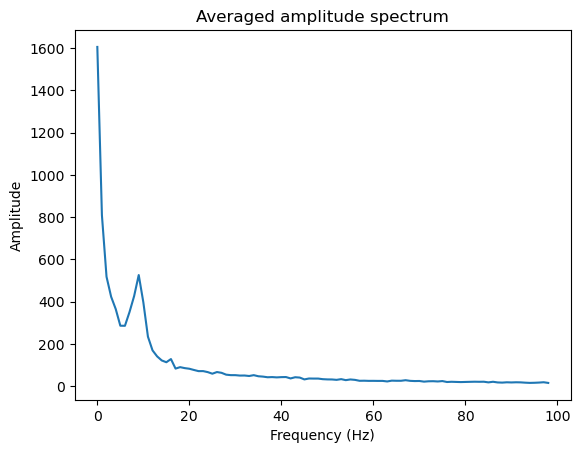

In [17]:
plt.figure()
plt.plot(np.mean(sumspec[:, 1:100], axis=0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Averaged amplitude spectrum')

plt.show()

Same, but we do 10 runs and look at the variability across runs after averaging 50 trials 

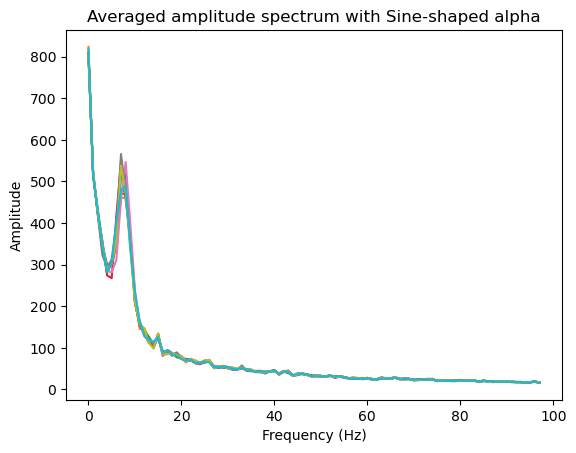

In [18]:
figure, ax = plt.subplots()
sumspecsine = np.zeros((50, 1000))

for run in range(10):
    for trial in range(50):
        brownsig[trial, :] = np.cumsum(whitesig[trial, :])
        
        alphasig = np.sin(2 * np.pi * time * (8 + np.random.rand(1) * 3)) * 3 # sine-shaped alpha function with random frequency from 8 to 11 Hz
        brownsig[trial, 300:700] = brownsig[trial, 300:700] + alphasig[300:700]
        
        fftspec = np.fft.fft(brownsig[trial, :])  # calculate DFT
        sumspecsine[trial, :] = np.abs(fftspec)  # save it for later
    
    ax.plot(np.mean(sumspecsine[:, 2:100], axis=0))

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
ax.set_title('Averaged amplitude spectrum with Sine-shaped alpha')

plt.show()

Same, but we do 10 runs with SAWTOOTH instead of sine-shaped akpha and look at the variability across runs after averaging 50 trials 


In [19]:
from scipy import signal


# Generate a time vector
time = np.linspace(0, 1, 1000)

# Create a sine wave
frq=np.random.uniform(low=8.0, high=11.0)
sine_wave = np.sin(2 * np.pi * time * frq) * 3

# Convert sine wave to sawtooth wave
#sawtooth_wave =  time % (2* np.pi / (2 * np.pi*np.random.uniform(low=8.0, high=11.0)))
#sawtooth_wave = 2 * (time % (1.0 / (2 * np.pi ))) - 1
#sawtooth_wave = 2 * (time*frq % (2* np.pi * frq)) #- 1
sawtooth_wave = signal.sawtooth(2 * np.pi * time * frq)*3


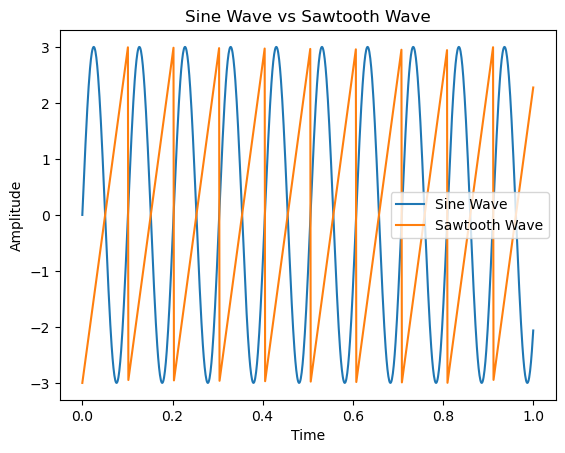

In [20]:
# Plot the original sine wave and the converted sawtooth wave
plt.plot(time, sine_wave, label='Sine Wave')
plt.plot(time, sawtooth_wave, label='Sawtooth Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Sine Wave vs Sawtooth Wave')
plt.show()

Let's make a dent into the 1/f shape

(Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Amplitude'),
 Text(0.5, 1.0, 'Averaged amplitude spectrum'))

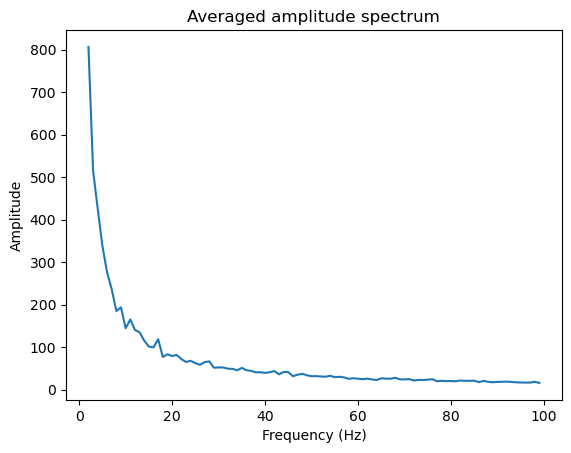

In [21]:

for trial in range(50):
    brownsig[trial,:] = np.cumsum(whitesig[trial,:]) - np.mean(np.cumsum(whitesig[trial,:]))
    # plt.subplot(2,1,1), plt.plot(time, brownsig[trial,:]), plt.xlabel('Time (sec)'), plt.ylabel('Voltage'), plt.title('1 second of Brownian noise')
    fftspec = np.fft.fft(brownsig[trial,:]) # calculate DFT
    sumspec[trial, :] = abs(fftspec) # save it for later
    # plt.subplot(2,1,2), plt.plot(abs(fftspec[2:30])), plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude'), plt.title('Amplitude spectrum')

plt.figure()
plt.plot(faxis[2:100], np.mean((sumspec[:, 2:100]), axis=0))
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude'), plt.title('Averaged amplitude spectrum')


Change the gain.

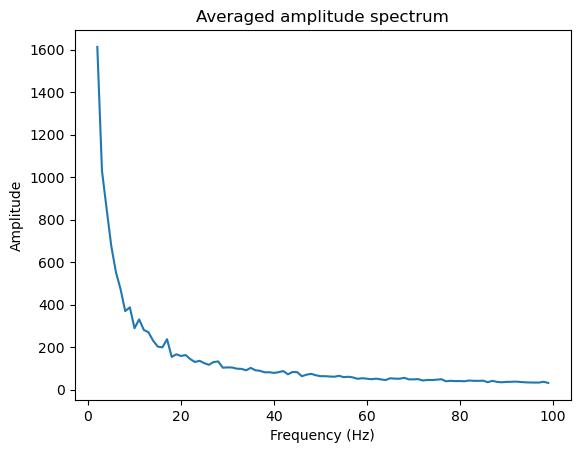

In [22]:
for trial in range(50):
    brownsig[trial,:] = np.cumsum(whitesig[trial,:]*2) - np.mean(np.cumsum(whitesig[trial,:]*2))
    # plt.subplot(2,1,1), plt.plot(time, brownsig[trial,:]), plt.xlabel('Time (sec)'), plt.ylabel('Voltage'), plt.title('1 second of Brownian noise')
    fftspec = np.fft.fft(brownsig[trial,:]) # calculate DFT
    sumspec[trial, :] = abs(fftspec) # save it for later
    # plt.subplot(2,1,2), plt.plot(abs(fftspec[2:30])), plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude'), plt.title('Amplitude spectrum')

#plt.figure()
plt.plot(faxis[2:100], np.mean((sumspec[:, 2:100]), axis=0))
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude'), plt.title('Averaged amplitude spectrum')
plt.show()

Now, we add a variable alpha oscillation to each trial.

In [ ]:


# %% [matlab]
# for trial = 1:50
#     brownsig(trial,:) = cumsum(whitesig(trial, :));
#     alphasig = sin(2*pi*time*(8+rand(1,1).*3)).*3;
#     brownsig(trial, 300:700) = brownsig(trial, 300:700) + alphasig(300:700); 
#     subplot(2,1,1), plot(time, brownsig(trial,:)), xlabel('Time (sec)'), ylabel('Voltage'), title('1 second of Brownian noise')
#     fftspec = fft(brownsig(trial,:)); % calculate DFT
#     sumspec(trial, :) = abs(fftspec); % save it for later
#     subplot(2,1,2), plot(abs(fftspec (2:30))), xlabel('Frequency (Hz)'),ylabel('Amplitude'),title('Amplitude spectrum')
#     pause(.2)

# end

# figure
# plot(mean((sumspec(:, 2:30))))
# xlabel('Frequency (Hz)'),ylabel('Amplitude'),title('Averaged amplitude spectrum')

# %% [markdown]
# Same, but we do 10 runs and look at the variability across runs after averaging 50 trials 

# %% [matlab]
# figure, hold on

# for run = 1:10
#   for trial = 1:50
#     brownsig(trial,:) = cumsum(whitesig(trial, :));
#     alphasig = sin(2*pi*time*(8+rand(1,1).*3)).*3;
#     brownsig(trial, 300:700) = brownsig(trial, 300:700) + alphasig(300:700); 
#     fftspec = fft(brownsig(trial,:)); % calculate DFT
#     sumspecsine(trial, :) = abs(fftspec); % save it for later
#   end

#   plot(mean((sumspecsine(:, 2:30))))
#   xlabel('Frequency (Hz)'),ylabel('Amplitude'),title('Averaged amplitude spectrum with Sine-shaped alpha')
# end
# hold off

# %% [markdown]
# Same, but we do 10 runs with SAWTOOTH instead of sine-shaped akpha and look at the variability across runs after averaging 50 trials 

# %% [matlab]
# figure, hold on

# for run = 1:10
#   for trial = 1:50
#     brownsig(trial,:) = cumsum(whitesig(trial, :));
#     alphasig = sawtooth(2*pi*time*(8+rand(1,1).*3)).*3;
#     brownsig(trial, 300:700) = brownsig(trial, 300:700) + alphasig(300:700); 
#     fftspec = fft(brownsig(trial,:)); % calculate DFT
#     sumspec(trial, :) = abs(fftspec); % save it for later
#   end

#   plot(mean((sumspec(:, 2:30))))
#   xlabel('Frequency (Hz)'),ylabel('Amplitude'),title('Averaged amplitude spectrum with non-sine-shaped alpha')
# end
# hold off

# figure
#   plot(mean((sumspecsine(:, 2:30))))
#   hold on 
#   plot(mean((sumspec(:, 2:30))))
#   legend('Sine-shaped', 'Sawtooth-shaped')

# %% [markdown]
# Let's make a dent into the 1/f shape

# %% [matlab]
# for trial = 1:50

#     brownsig(trial,:) = cumsum(whitesig(trial, :))-mean(cumsum(whitesig(trial, :)));
#     %subplot(2,1,1), plot(time, brownsig(trial,:)), xlabel('Time (sec)'), ylabel('Voltage'), title('1 second of Brownian noise')
#     fftspec = fft(brownsig(trial,:)); % calculate DFT
#     sumspec(trial, :) = abs(fftspec); % save it for later
#     %subplot(2,1,2), plot(abs(fftspec (2:30))), xlabel('Frequency (Hz)'),ylabel('Amplitude'),title('Amplitude spectrum')

# end

# figure
# plot(faxis(2:30), mean((sumspec(:, 2:30))))
# xlabel('Frequency (Hz)'),ylabel('Amplitude'),title('Averaged amplitude spectrum')
# hold on

# % change the gain
# for trial = 1:50

#     brownsig(trial,:) = cumsum(whitesig(trial, :).*2)-mean(cumsum(whitesig(trial, :).*2));
#     %subplot(2,1,1), plot(time, brownsig(trial,:)), xlabel('Time (sec)'), ylabel('Voltage'), title('1 second of Brownian noise')
#     fftspec = fft(brownsig(trial,:)); % calculate DFT
#     sumspec(trial, :) = abs(fftspec); % save it for later
#     %subplot(2,1,2), plot(abs(fftspec (2:30))), xlabel('Frequency (Hz)'),ylabel('Amplitude'),title('Amplitude spectrum')

# end

# plot(faxis(2:30),mean((sumspec(:, 2:30))))
# xlabel('Frequency (Hz)'),ylabel('Amplitude'),title('Averaged amplitude spectrum')
# hold on

# %% [markdown]
# 




Extra:

In [ ]:

# %% [markdown]
# # Alternative SciPy functions

# %%
from scipy import signal

# Generate a time vector
time = np.linspace(0, 1, 1000)
plt.plot(time, signal.sawtooth(2 * np.pi * 5 * time),linewidth=1.5,label='sawtooth')
#plt.show()

plt.plot(time, signal.square(2 * np.pi * 5 * time, duty=0.5), label='square, duty=0.5',  linewidth=3, linestyle=':')
plt.plot(time, signal.square(2 * np.pi * 5 * time, duty=0.25), label='square, duty=0.25',  linewidth=1, linestyle='--')
plt.legend()
plt.ylim(-2, 2)

# %%
figure, ax = plt.subplots()
#sumspecsine = np.zeros((50, 1000))
sumspec = np.zeros((50, 1000))

for run in range(10):
    for trial in range(50):
        brownsig[trial, :] = np.cumsum(whitesig[trial, :])
        frq=np.random.uniform(low=8.0, high=11.0)
        alphasig = sawtooth_wave = signal.sawtooth(2 * np.pi * time * frq)*3
        #alphasig = np.sign(np.sin(2 * np.pi * time * (8 + np.random.rand(1) * 3))) * 3
        brownsig[trial, 300:700] = brownsig[trial, 300:700] + alphasig[300:700]
        
        fftspec = np.fft.fft(brownsig[trial, :])  # calculate DFT
        sumspec[trial, :] = np.abs(fftspec)  # save it for later
    
    ax.plot(np.mean(sumspec[:, 2:30], axis=0))

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
ax.set_title('Averaged amplitude spectrum with non-sine-shaped alpha')

figure2, ax2 = plt.subplots()
ax2.plot(np.mean(sumspecsine[:, 2:30], axis=0), label='Sine-shaped')
ax2.plot(np.mean(sumspec[:, 2:30], axis=0), label='Sawtooth-shaped')
ax2.legend()

plt.show()
